# Datasets

In [ ]:
!cp -r drive/MyDrive/T2ML ./

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import make_scorer, precision_recall_fscore_support,confusion_matrix, accuracy_score

In [ ]:
PATIENTS_DATASET = "./T2ML/date_tema_1_iaut_2024.csv"
PATIENTS_NUMERICAL_COLUMNS = [
    "Age",
    "Est_avg_calorie_intake",
    "Main_meals_daily",
    "Height",
    "Water_daily",
    "Weight",
    "Sedentary_hours_daily",
    "Physical_activity_level",
    "Regular_fiber_diet",
]
PATIENTS_CATEGORICAL_COLUMNS = [
    "Transportation",
    "Diagnostic_in_family_history",
    "High_calorie_diet",
    "Alcohol",
    "Snacks",
    "Smoker",
    "Calorie_monitoring",
    "Technology_time_use",
    "Gender"
]

MIT_TRAIN_DATASET = "./T2ML/mitbih_train.csv"
MIT_TEST_DATASET = "./T2ML/mitbih_test.csv"
ECG_NORMAL_DATASET = "./T2ML/ptbdb_normal.csv"
ECG_ABNORMAL_DATASET = "./T2ML/ptbdb_abnormal.csv"

In [ ]:
df_patients = pd.read_csv(PATIENTS_DATASET)

for col in PATIENTS_NUMERICAL_COLUMNS:
    df_patients[col] = df_patients[col].astype(str).str.replace(',', '.').astype(float)
for col in PATIENTS_CATEGORICAL_COLUMNS:
    df_patients[col] = df_patients[col].astype("category")

df_ecg_normal = pd.read_csv(ECG_NORMAL_DATASET)
df_ecg_normal = df_ecg_normal.set_axis([str(x) for x in range(188)], axis=1)

df_ecg_abnormal = pd.read_csv(ECG_ABNORMAL_DATASET)
df_ecg_abnormal = df_ecg_abnormal.set_axis([str(x) for x in range(188)], axis=1)


df_ecg = pd.concat([df_ecg_normal, df_ecg_abnormal], axis=0)

# df_mit_train = pd.read_csv(MIT_TRAIN_DATASET)
# df_mit_test = pd.read_csv(MIT_TEST_DATASET)

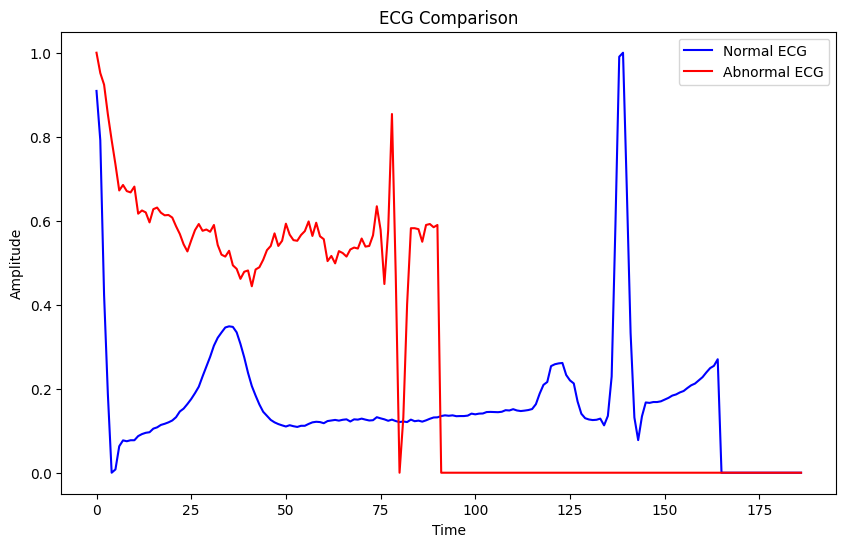

In [ ]:
normal_example = df_ecg_normal.iloc[0, :-1]
abnormal_example = df_ecg_abnormal.iloc[0, :-1]

time_vector = range(len(normal_example))


plt.figure(figsize=(10, 6))

# Plot normal and abnormal ECG on the same graph
plt.plot(time_vector, normal_example, label="Normal ECG", color='b')
plt.plot(time_vector, abnormal_example, label="Abnormal ECG", color='r')

# Add title and labels
plt.title("ECG Comparison")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# Add legend
plt.legend()

# Show plot
plt.show()

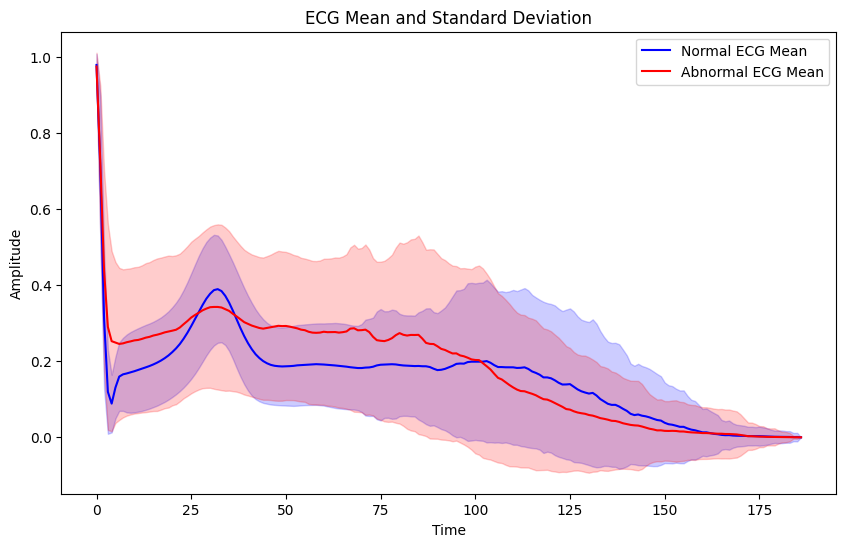

In [ ]:
normal_example = df_ecg_normal.iloc[0, :-1]
abnormal_example = df_ecg_abnormal.iloc[0, :-1]

# Create a time vector (assuming each column represents a time moment)
time_vector = range(len(normal_example))

# Calculate mean and stddev for each column
normal_mean = df_ecg_normal.iloc[:, :-1].mean()
normal_std = df_ecg_normal.iloc[:, :-1].std()
abnormal_mean = df_ecg_abnormal.iloc[:, :-1].mean()
abnormal_std = df_ecg_abnormal.iloc[:, :-1].std()

# Plot the first example from each dataframe
plt.figure(figsize=(10, 6))

# Normal ECG mean and stddev
plt.plot(time_vector, normal_mean, label="Normal ECG Mean", color='b')
plt.fill_between(time_vector, normal_mean - normal_std, normal_mean + normal_std, color='b', alpha=0.2)

# Abnormal ECG mean and stddev
plt.plot(time_vector, abnormal_mean, label="Abnormal ECG Mean", color='r')
plt.fill_between(time_vector, abnormal_mean - abnormal_std, abnormal_mean + abnormal_std, color='r', alpha=0.2)

plt.title("ECG Mean and Standard Deviation")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [38]:
def custom_scoring(clf, X, y_true):
    y_pred = clf.predict(X)

    for i in range(len(y_pred)):
      max_index = np.argmax(y_pred[i])
      y_pred[i] = np.zeros_like(y_pred[i])
      y_pred[i][max_index] = 1

    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=0.0)
    accuracy = accuracy_score(y_true, y_pred)
    return {'precision': precision, 'recall': recall, 'f1': f1, 'accuracy': accuracy}

# MLP Patients

In [124]:
scaler = StandardScaler()
df_patients[PATIENTS_NUMERICAL_COLUMNS] = scaler.fit_transform(df_patients[PATIENTS_NUMERICAL_COLUMNS])

for col in PATIENTS_CATEGORICAL_COLUMNS + ["Diagnostic"]:
    df_patients[col] = df_patients[col].astype("category")
    le = LabelEncoder()
    df_patients[col] = le.fit_transform(df_patients[col])

X = df_patients.iloc[:, :-1]
y = df_patients.iloc[:, -1:]
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

13/13 [==============================] - 0s 3ms/step


ValueError: multilabel-indicator is not supported

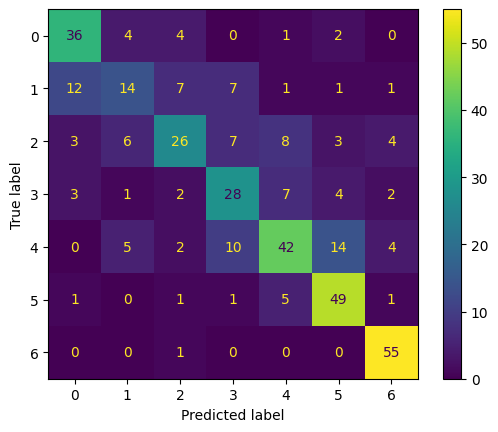

In [128]:
res_scores = {}
res_loss = {}
import seaborn as sns

for i in [0]:
  for dim1 in [64]:
    for dim2 in [128]:
      for dim3 in [64]:

        model_patients = Sequential()
        model_patients.add(Dense(dim1, input_dim=18, activation='relu'))  # First hidden layer
        if i == 0:
          model_patients.add(Dense(dim2, activation='relu'))  # Second hidden layer

        model_patients.add(Dense(dim3, activation='relu'))  # Second hidden layer
        model_patients.add(Dense(7, activation='softmax'))  # Output layer

        model_patients.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        loss = model_patients.fit(X_train, y_train, epochs=15, batch_size=48, validation_data=(X_test, y_test), verbose=0)

        if i == 0:
          model = f"L1: {dim1} - L2: {dim2} - L3: {dim3}"
        else:
          model = f"L1: {dim1} - L2: {dim3}"

        plot_model(model_patients, show_shapes=True)
        y_pred = model_patients.predict(X_test)

        for i in range(len(y_pred)):
          max_index = np.argmax(y_pred[i])
          y_pred[i] = np.zeros_like(y_pred[i])
          y_pred[i][max_index] = 1
        cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
        disp = ConfusionMatrixDisplay(cm)
        disp.plot()


        res_scores[model] = custom_scoring(model_patients, X_test, y_test)
        res_loss[model] = loss

In [51]:
print(len(res_loss.keys()))

48


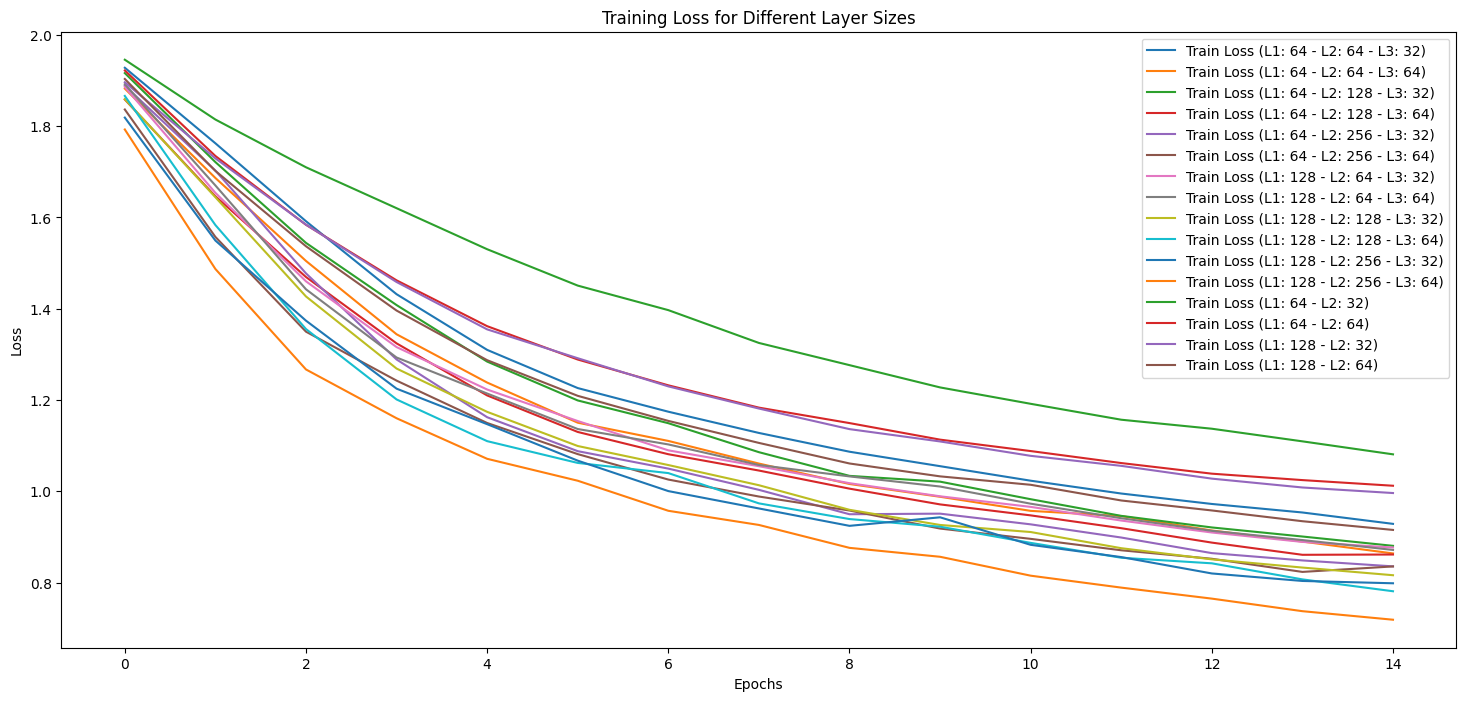

In [66]:
# print(res_loss)
plotted = {}
plt.figure(figsize=(18, 8))
for i in range(2):
  for dim1 in [64, 128]:
    for dim2 in [64, 128, 256]:
      for dim3 in [32, 64]:
        if i == 0:
          model = f"L1: {dim1} - L2: {dim2} - L3: {dim3}"
        else:
          model = f"L1: {dim1} - L2: {dim3}"
        history = res_loss[model]
        if model not in plotted:
          plt.plot(history.history['loss'], label=f'Train Loss ({model})')
          plotted[model] = True

plt.title('Training Loss for Different Layer Sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

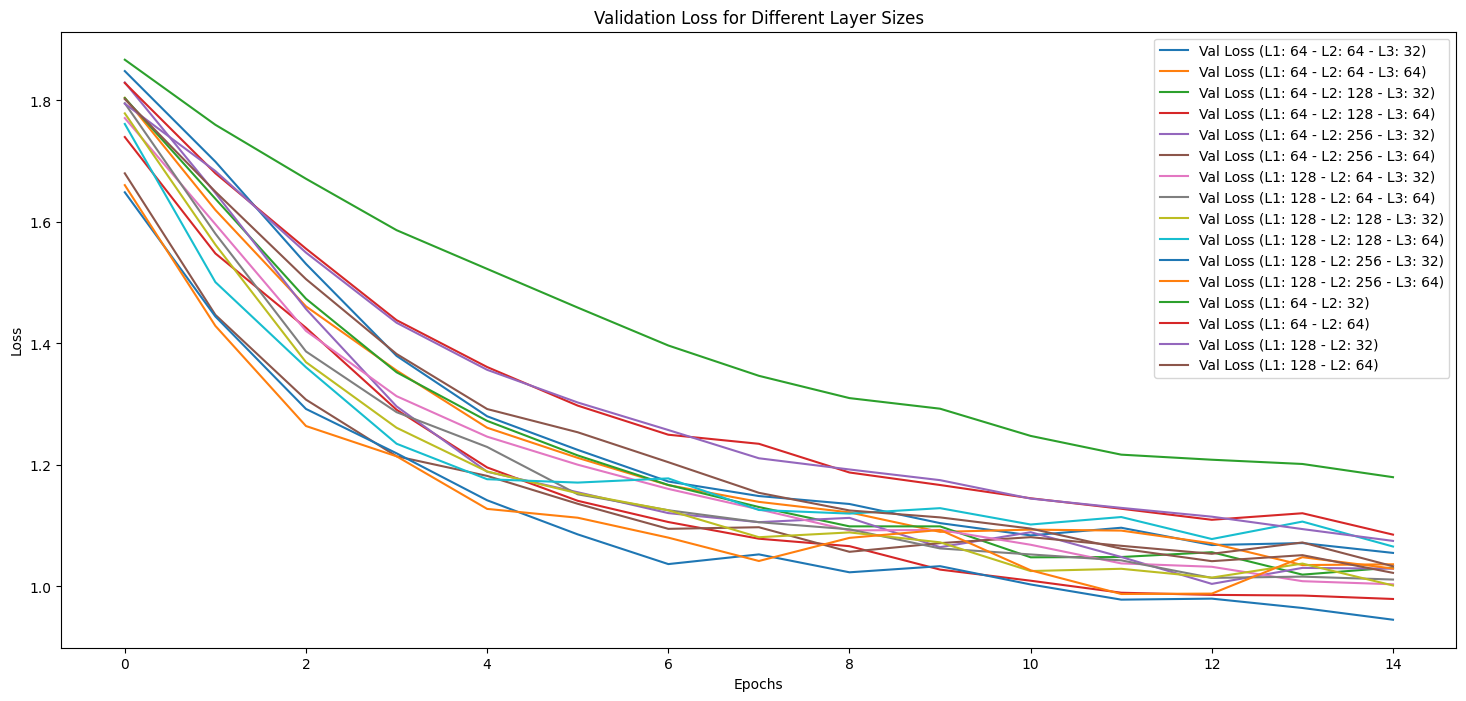

In [67]:
plotted = {}

plt.figure(figsize=(18, 8))
for i in range(2):
  for dim1 in [64, 128]:
    for dim2 in [64, 128, 256]:
      for dim3 in [32, 64]:
        if i == 0:
          model = f"L1: {dim1} - L2: {dim2} - L3: {dim3}"
        else:
          model = f"L1: {dim1} - L2: {dim3}"
        history = res_loss[model]

        if model not in plotted:
          plt.plot(history.history['val_loss'], label=f'Val Loss ({model})')
          plotted[model] = True

plt.title('Validation Loss for Different Layer Sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [79]:
dict_scores = {
    'model': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'accuracy': [],
}
for model, scores in res_scores.items():
  dict_scores["model"] = dict_scores["model"] + [model]
  dict_scores["precision"] = dict_scores["precision"] + [scores["precision"]]
  dict_scores["recall"] = dict_scores["recall"] + [scores["recall"]]
  dict_scores["f1"] = dict_scores["f1"] + [scores["f1"]]
  dict_scores["accuracy"] = dict_scores["accuracy"] + [scores["accuracy"]]

df_res = pd.DataFrame(data=dict_scores)

highlight_specific = df_res.style.set_properties(**{'background-color': 'white',
                           'color': 'black'}).highlight_max(subset=['precision', 'recall', 'f1', 'accuracy'], axis=0)
display(highlight_specific)

,model,precision,recall,f1,accuracy
0,L1: 64 - L2: 64 - L3: 32,0.603098,0.607792,0.600420,0.607792
1,L1: 64 - L2: 64 - L3: 64,0.627063,0.636364,0.622243,0.636364
2,L1: 64 - L2: 128 - L3: 32,0.620246,0.615584,0.607400,0.615584
3,L1: 64 - L2: 128 - L3: 64,0.675825,0.675325,0.673051,0.675325
4,L1: 64 - L2: 256 - L3: 32,0.685399,0.672727,0.670779,0.672727
5,L1: 64 - L2: 256 - L3: 64,0.653483,0.654545,0.651005,0.654545
6,L1: 128 - L2: 64 - L3: 32,0.637623,0.644156,0.633430,0.644156
7,L1: 128 - L2: 64 - L3: 64,0.634513,0.641558,0.623842,0.641558
8,L1: 128 - L2: 128 - L3: 32,0.652999,0.657143,0.648136,0.657143
9,L1: 128 - L2: 128 - L3: 64,0.649779,0.664935,0.651352,0.664935


# MLP ECG

In [86]:
X = df_ecg.iloc[:, :-1]
y = df_ecg.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
def custom_scoring(clf, X, y_true):
    y_pred = np.round(clf.predict(X))

    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=0.0)
    accuracy = accuracy_score(y_true, y_pred)
    return {'precision': precision, 'recall': recall, 'f1': f1, 'accuracy': accuracy}

Epoch 1/15
243/243 [==============================] - 4s 8ms/step - loss: 0.3438 - accuracy: 0.8384 - val_loss: 0.2413 - val_accuracy: 0.9031
Epoch 2/15
243/243 [==============================] - 2s 7ms/step - loss: 0.2089 - accuracy: 0.9207 - val_loss: 0.1905 - val_accuracy: 0.9282
Epoch 3/15
243/243 [==============================] - 1s 6ms/step - loss: 0.1495 - accuracy: 0.9421 - val_loss: 0.1669 - val_accuracy: 0.9337
Epoch 4/15
243/243 [==============================] - 2s 7ms/step - loss: 0.1165 - accuracy: 0.9567 - val_loss: 0.1540 - val_accuracy: 0.9430
Epoch 5/15
243/243 [==============================] - 2s 7ms/step - loss: 0.0911 - accuracy: 0.9668 - val_loss: 0.1171 - val_accuracy: 0.9550
Epoch 6/15
243/243 [==============================] - 2s 7ms/step - loss: 0.0794 - accuracy: 0.9720 - val_loss: 0.1403 - val_accuracy: 0.9522
Epoch 7/15
243/243 [==============================] - 2s 8ms/step - loss: 0.0606 - accuracy: 0.9776 - val_loss: 0.1099 - val_accuracy: 0.9639
Epoch 

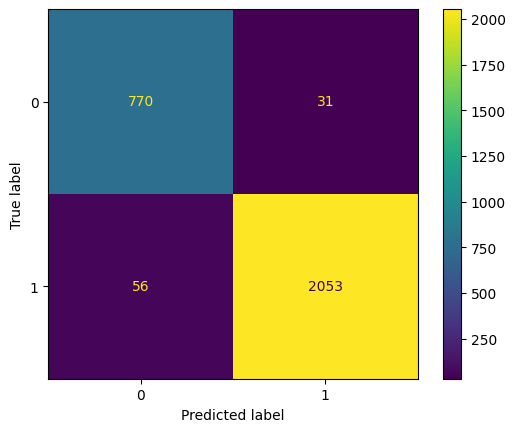

In [122]:
res_scores = {}
res_loss = {}

for i in [0]:
  for dim1 in [128]:
    for dim2 in [128]:
      for dim3 in [64]:

        model_patients = Sequential()
        model_patients.add(Dense(dim1, input_dim=187, activation='relu'))  # First hidden layer
        if i == 0:
          model_patients.add(Dense(dim2, activation='relu'))  # Second hidden layer

        model_patients.add(Dense(dim3, activation='relu'))  # Second hidden layer
        model_patients.add(Dense(1, activation='sigmoid'))  # Output layer

        model_patients.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        loss = model_patients.fit(X_train, y_train, epochs=15, batch_size=48, validation_data=(X_test, y_test), verbose=1)

        if i == 0:
          model = f"L1: {dim1} - L2: {dim2} - L3: {dim3}"
        else:
          model = f"L1: {dim1} - L2: {dim3}"


        plot_model(model_patients, show_shapes=True)
        y_pred = np.round(model_patients.predict(X_test))
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(cm)
        disp.plot()

        res_scores[model] = custom_scoring(model_patients, X_test, y_test)
        res_loss[model] = loss


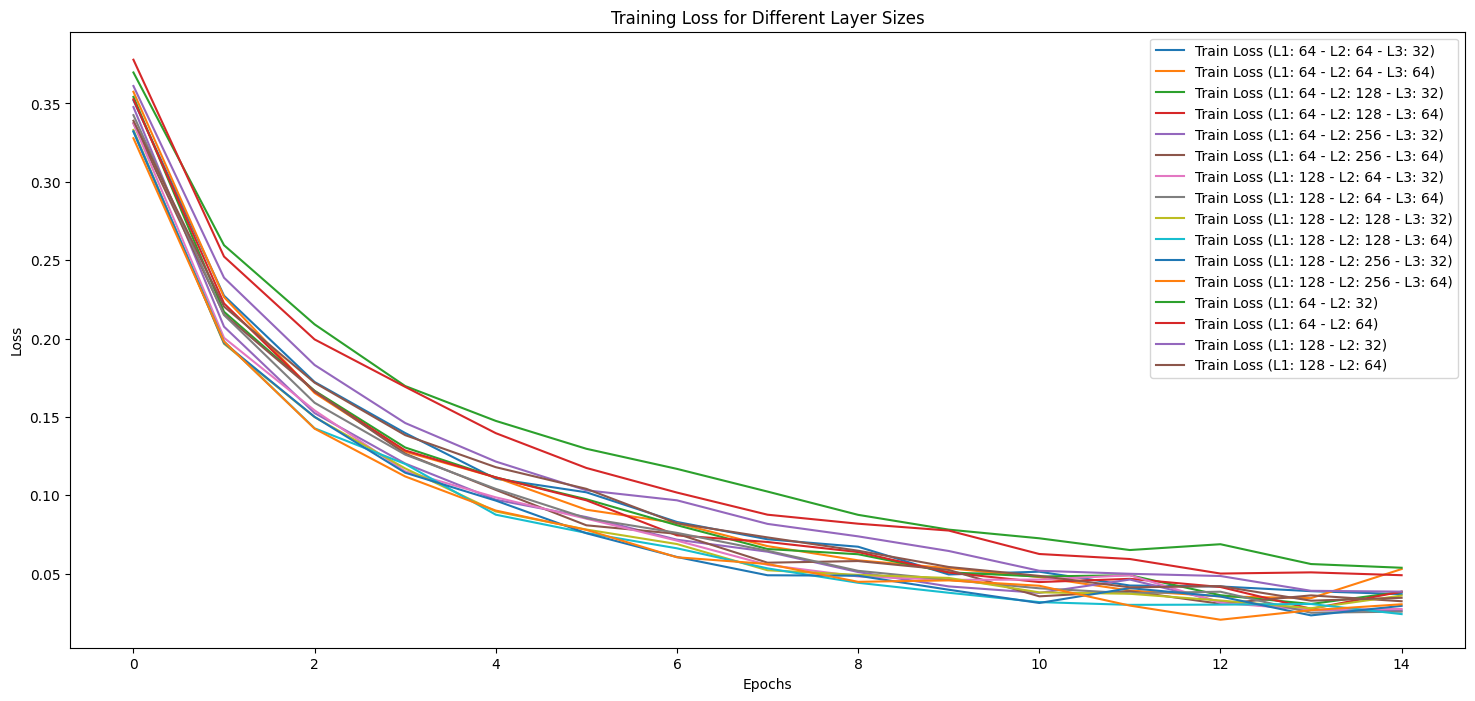

In [96]:
# print(res_loss)
plotted = {}
plt.figure(figsize=(18, 8))
for i in range(2):
  for dim1 in [64, 128]:
    for dim2 in [64, 128, 256]:
      for dim3 in [32, 64]:
        if i == 0:
          model = f"L1: {dim1} - L2: {dim2} - L3: {dim3}"
        else:
          model = f"L1: {dim1} - L2: {dim3}"
        history = res_loss[model]
        if model not in plotted:
          plt.plot(history.history['loss'], label=f'Train Loss ({model})')
          plotted[model] = True

plt.title('Training Loss for Different Layer Sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

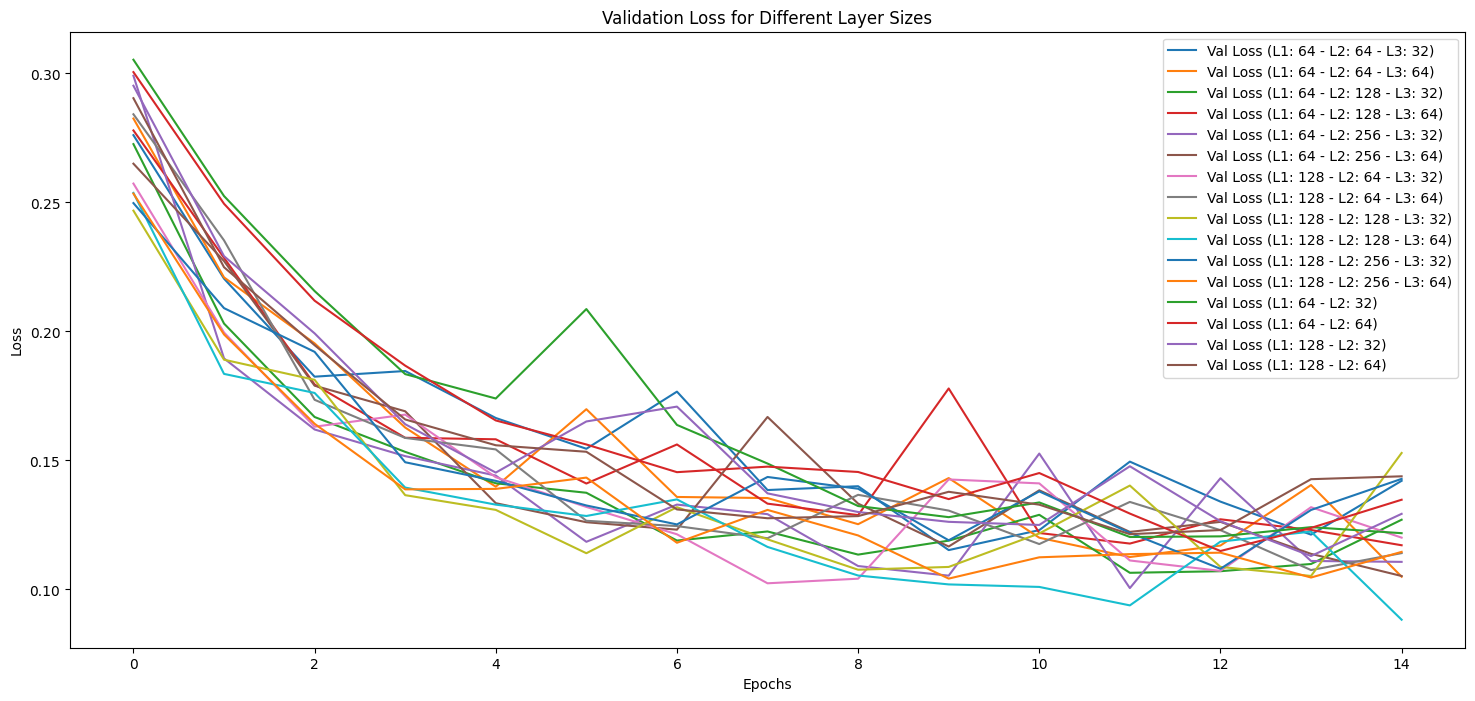

In [97]:
plotted = {}

plt.figure(figsize=(18, 8))
for i in range(2):
  for dim1 in [64, 128]:
    for dim2 in [64, 128, 256]:
      for dim3 in [32, 64]:
        if i == 0:
          model = f"L1: {dim1} - L2: {dim2} - L3: {dim3}"
        else:
          model = f"L1: {dim1} - L2: {dim3}"
        history = res_loss[model]

        if model not in plotted:
          plt.plot(history.history['val_loss'], label=f'Val Loss ({model})')
          plotted[model] = True

plt.title('Validation Loss for Different Layer Sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [98]:
dict_scores = {
    'model': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'accuracy': [],
}
for model, scores in res_scores.items():
  dict_scores["model"] = dict_scores["model"] + [model]
  dict_scores["precision"] = dict_scores["precision"] + [scores["precision"]]
  dict_scores["recall"] = dict_scores["recall"] + [scores["recall"]]
  dict_scores["f1"] = dict_scores["f1"] + [scores["f1"]]
  dict_scores["accuracy"] = dict_scores["accuracy"] + [scores["accuracy"]]

df_res = pd.DataFrame(data=dict_scores)

highlight_specific = df_res.style.set_properties(**{'background-color': 'white',
                           'color': 'black'}).highlight_max(subset=['precision', 'recall', 'f1', 'accuracy'], axis=0)
display(highlight_specific)

,model,precision,recall,f1,accuracy
0,L1: 64 - L2: 64 - L3: 32,0.963047,0.963230,0.963001,0.963230
1,L1: 64 - L2: 64 - L3: 64,0.963833,0.963918,0.963868,0.963918
2,L1: 64 - L2: 128 - L3: 32,0.960057,0.959107,0.958286,0.959107
3,L1: 64 - L2: 128 - L3: 64,0.962199,0.962199,0.962199,0.962199
4,L1: 64 - L2: 256 - L3: 32,0.966963,0.966667,0.966774,0.966667
5,L1: 64 - L2: 256 - L3: 64,0.964857,0.964948,0.964894,0.964948
6,L1: 128 - L2: 64 - L3: 32,0.965144,0.965292,0.965061,0.965292
7,L1: 128 - L2: 64 - L3: 64,0.964839,0.964948,0.964880,0.964948
8,L1: 128 - L2: 128 - L3: 32,0.953397,0.952921,0.952043,0.952921
9,L1: 128 - L2: 128 - L3: 64,0.972406,0.972509,0.972399,0.972509


# CONV ECG

In [100]:
X = df_ecg.iloc[:, :-1]
y = df_ecg.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def custom_scoring(clf, X, y_true):
    y_pred = np.round(clf.predict(X))
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=0.0)
    accuracy = accuracy_score(y_true, y_pred)
    return {'precision': precision, 'recall': recall, 'f1': f1, 'accuracy': accuracy}

Epoch 1/15
243/243 [==============================] - 8s 13ms/step - loss: 0.3762 - accuracy: 0.8337 - val_loss: 1.2711 - val_accuracy: 0.7247
Epoch 2/15
243/243 [==============================] - 3s 13ms/step - loss: 0.2649 - accuracy: 0.8896 - val_loss: 1.2037 - val_accuracy: 0.7265
Epoch 3/15
243/243 [==============================] - 3s 12ms/step - loss: 0.2206 - accuracy: 0.9070 - val_loss: 0.5884 - val_accuracy: 0.7711
Epoch 4/15
243/243 [==============================] - 2s 9ms/step - loss: 0.1772 - accuracy: 0.9351 - val_loss: 0.3754 - val_accuracy: 0.8639
Epoch 5/15
243/243 [==============================] - 2s 8ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.2332 - val_accuracy: 0.9103
Epoch 6/15
243/243 [==============================] - 2s 8ms/step - loss: 0.1257 - accuracy: 0.9519 - val_loss: 0.1257 - val_accuracy: 0.9519
Epoch 7/15
243/243 [==============================] - 2s 8ms/step - loss: 0.1025 - accuracy: 0.9622 - val_loss: 0.2256 - val_accuracy: 0.9076
Epo

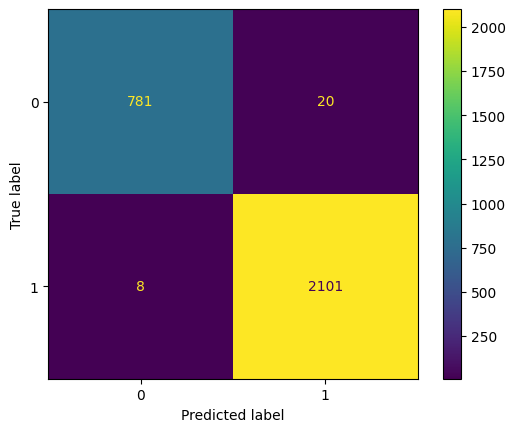

In [120]:
from keras.layers import Conv1D, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization
from keras.utils import plot_model

res_scores = {}
res_loss = {}

for i in [0]:
  for k in [3]:
    for d in [0.3]:

        model_ecg = Sequential()
        model_ecg.add(Conv1D(32, kernel_size=k, activation='relu', input_shape=(187, 1)))  # First convolutional layer
        model_ecg.add(BatchNormalization())
        model_ecg.add(Conv1D(64, kernel_size=k, activation='relu'))  # Second convolutional layer
        model_ecg.add(BatchNormalization())

        if i == 0:
          model_ecg.add(Conv1D(128, kernel_size=k, activation='relu'))  # Third convolutional layer
          model_ecg.add(BatchNormalization())

        model_ecg.add(GlobalAveragePooling1D())  # Global average pooling layer
        model_ecg.add(Dense(128, activation='relu'))  # Dense layer
        model_ecg.add(Dropout(d))  # Dropout layer
        model_ecg.add(Dense(1, activation='sigmoid'))  # Output layer

        model_ecg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        plot_model(model_ecg, show_shapes=True)

        loss = model_ecg.fit(X_train, y_train, epochs=15, batch_size=48, validation_data=(X_test, y_test))

        model = f"L: {3 if i == 0 else 2} - K: {k} - D: {d}"

        plot_model(model_ecg, show_shapes=True)
        y_pred = np.round(model_ecg.predict(X_test))
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(cm)
        disp.plot()

        res_scores[model] = custom_scoring(model_ecg, X_test, y_test)
        res_loss[model] = loss

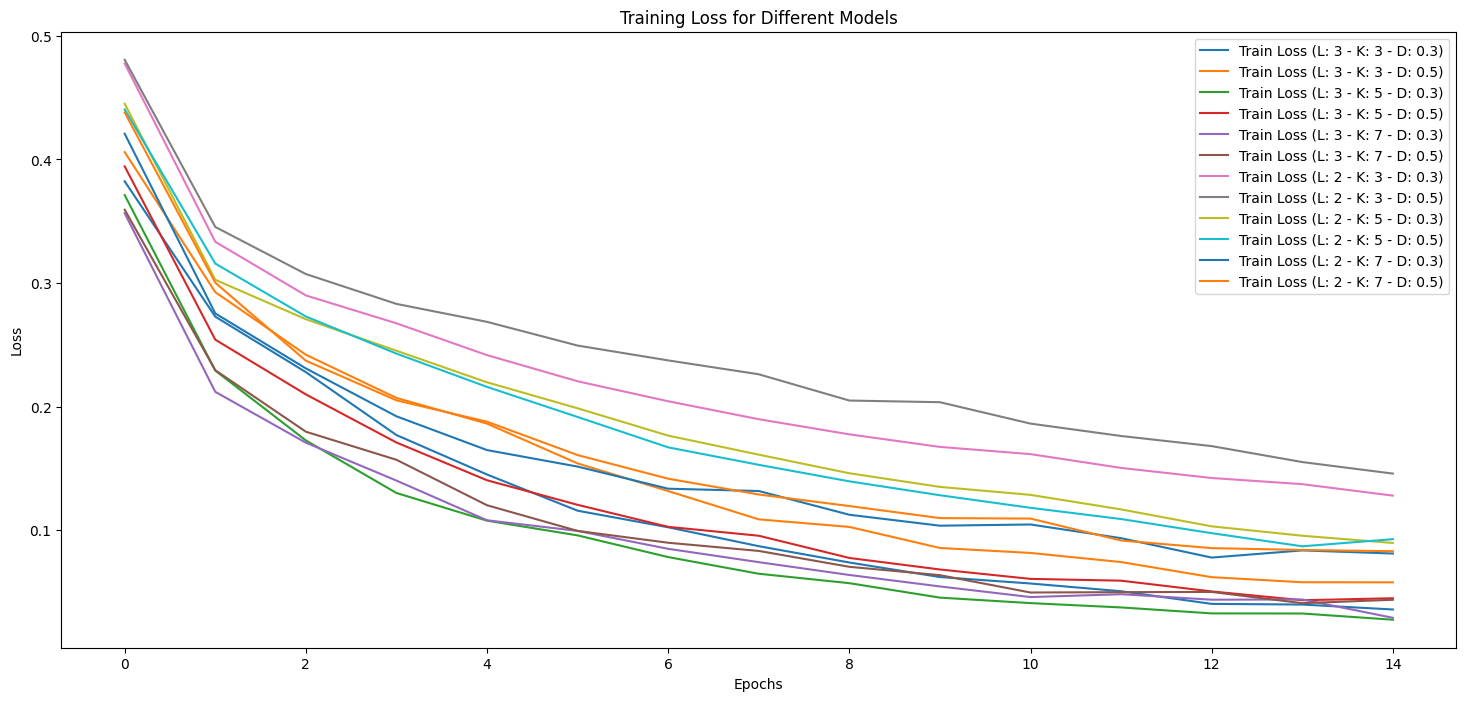

In [109]:
plotted = {}
plt.figure(figsize=(18, 8))
for i in [0, 1]:
  for k in [3,5,7]:
    for d in [0.3, 0.5]:

        model = f"L: {3 if i == 0 else 2} - K: {k} - D: {d}"
        history = res_loss[model]
        if model not in plotted:
          plt.plot(history.history['loss'], label=f'Train Loss ({model})')
          plotted[model] = True

plt.title('Training Loss for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

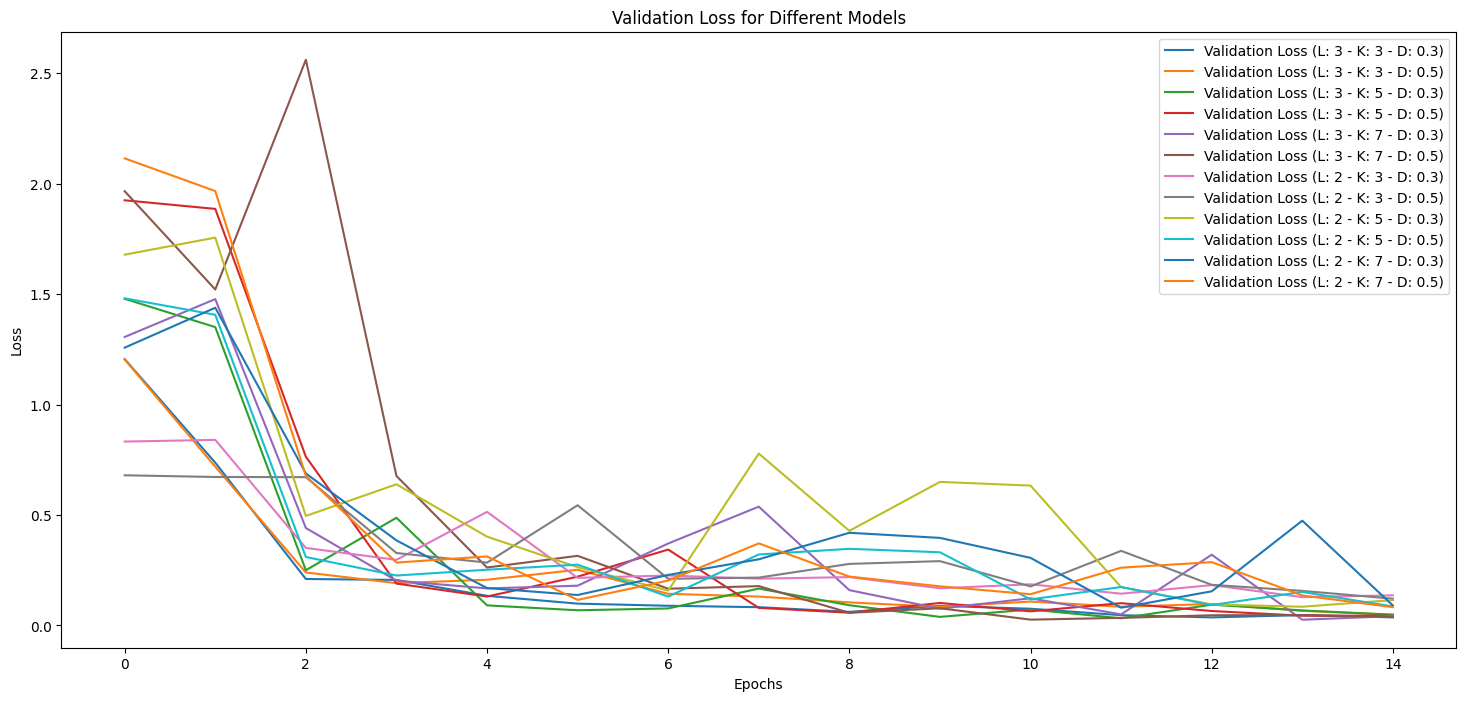

In [110]:
plotted = {}
plt.figure(figsize=(18, 8))
for i in [0, 1]:
  for k in [3,5,7]:
    for d in [0.3, 0.5]:

        model = f"L: {3 if i == 0 else 2} - K: {k} - D: {d}"
        history = res_loss[model]
        if model not in plotted:
          plt.plot(history.history['val_loss'], label=f'Validation Loss ({model})')
          plotted[model] = True

plt.title('Validation Loss for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [111]:
dict_scores = {
    'model': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'accuracy': [],
}
for model, scores in res_scores.items():
  dict_scores["model"] = dict_scores["model"] + [model]
  dict_scores["precision"] = dict_scores["precision"] + [scores["precision"]]
  dict_scores["recall"] = dict_scores["recall"] + [scores["recall"]]
  dict_scores["f1"] = dict_scores["f1"] + [scores["f1"]]
  dict_scores["accuracy"] = dict_scores["accuracy"] + [scores["accuracy"]]

df_res = pd.DataFrame(data=dict_scores)

highlight_specific = df_res.style.set_properties(**{'background-color': 'white',
                           'color': 'black'}).highlight_max(subset=['precision', 'recall', 'f1', 'accuracy'], axis=0)
display(highlight_specific)

,model,precision,recall,f1,accuracy
0,L: 3 - K: 3 - D: 0.3,0.987640,0.987629,0.987634,0.987629
1,L: 3 - K: 3 - D: 0.5,0.981743,0.981787,0.981740,0.981787
2,L: 3 - K: 5 - D: 0.3,0.985230,0.985223,0.985162,0.985223
3,L: 3 - K: 5 - D: 0.5,0.983957,0.983849,0.983742,0.983849
4,L: 3 - K: 7 - D: 0.3,0.986029,0.985911,0.985946,0.985911
5,L: 3 - K: 7 - D: 0.5,0.986047,0.985911,0.985817,0.985911
6,L: 2 - K: 3 - D: 0.3,0.950258,0.949485,0.949759,0.949485
7,L: 2 - K: 3 - D: 0.5,0.958379,0.957388,0.956504,0.957388
8,L: 2 - K: 5 - D: 0.3,0.953021,0.953265,0.952786,0.953265
9,L: 2 - K: 5 - D: 0.5,0.967241,0.965979,0.966284,0.965979
